<a href="https://colab.research.google.com/github/hoanganhloan172/Covid_19_analysis_by_PHA_DTD/blob/main/BTL%20CU%E1%BB%90I%20K%C3%8C/b%C3%A0i_t%E1%BA%ADp_l%E1%BB%9Bn_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [4]:
#đọc dữ liệu từ file csv
data = pd.read_csv('/content/owid-covid-data.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380405 entries, 0 to 380404
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    380405 non-null  object 
 1   continent                                   362192 non-null  object 
 2   location                                    380405 non-null  object 
 3   date                                        380405 non-null  object 
 4   total_cases                                 341501 non-null  float64
 5   new_cases                                   369504 non-null  float64
 6   new_cases_smoothed                          368274 non-null  float64
 7   total_deaths                                319445 non-null  float64
 8   new_deaths                                  369785 non-null  float64
 9   new_deaths_smoothed                         368555 non-null  float64
 

In [ ]:
#xóa các cột không cần thiết
columns_to_drop = ['iso_code', 'new_cases_smoothed', 'new_deaths_smoothed', 'new_cases_smoothed_per_million', 'new_deaths_smoothed_per_million']
data = data.drop(columns=columns_to_drop)
data.head(5)

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [ ]:
# Thay thế các giá trị thiếu bằng giá trị trung bình của cột
data.fillna(data.mean(), inplace=True)
data.head(5)

<ipython-input-176-43fca7e8f274>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,Asia,Afghanistan,2020-01-05,7.265074e+06,0.0,89263.4304,0.0,110505.866669,0.0,910.194825,...,32.909181,37.746,0.5,64.83,0.511,41128772.0,54605.762814,9.752607,10.984338,1769.376469
1,Asia,Afghanistan,2020-01-06,7.265074e+06,0.0,89263.4304,0.0,110505.866669,0.0,910.194825,...,32.909181,37.746,0.5,64.83,0.511,41128772.0,54605.762814,9.752607,10.984338,1769.376469
2,Asia,Afghanistan,2020-01-07,7.265074e+06,0.0,89263.4304,0.0,110505.866669,0.0,910.194825,...,32.909181,37.746,0.5,64.83,0.511,41128772.0,54605.762814,9.752607,10.984338,1769.376469
3,Asia,Afghanistan,2020-01-08,7.265074e+06,0.0,89263.4304,0.0,110505.866669,0.0,910.194825,...,32.909181,37.746,0.5,64.83,0.511,41128772.0,54605.762814,9.752607,10.984338,1769.376469
4,Asia,Afghanistan,2020-01-09,7.265074e+06,0.0,89263.4304,0.0,110505.866669,0.0,910.194825,...,32.909181,37.746,0.5,64.83,0.511,41128772.0,54605.762814,9.752607,10.984338,1769.376469


In [ ]:
#tóm tắt, tổng quan về dữ liệu
data.describe()

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,reproduction_rate,icu_patients,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,3.415010e+05,3.695040e+05,3.194450e+05,369785.000000,341501.000000,369504.000000,319445.000000,369785.000000,184817.000000,38502.000000,...,218615.000000,144632.000000,260783.000000,350260.000000,286370.000000,3.804050e+05,1.312100e+04,13121.000000,13121.000000,13121.000000
mean,7.265074e+06,8.886025e+03,8.926343e+04,79.520708,110505.866669,134.951139,910.194825,0.841796,0.911495,669.725988,...,32.909181,50.790394,3.097467,73.713693,0.722592,1.292451e+08,5.460576e+04,9.752607,10.984338,1769.376469
std,4.343268e+07,2.418896e+05,4.537613e+05,1437.485087,158573.621293,1558.299604,1126.242714,7.371379,0.399925,2155.070550,...,13.571764,31.952554,2.548144,7.395171,0.149007,6.633481e+08,1.512947e+05,11.970158,24.561162,1986.681517
min,1.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-0.070000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2936.453100
25%,9.109000e+03,0.000000e+00,1.340000e+02,0.000000,2901.115000,0.000000,64.966000,0.000000,0.720000,22.000000,...,22.600000,20.859000,1.300000,69.590000,0.602000,4.490020e+05,1.724999e+02,2.000000,-1.520000,116.117455
50%,7.820500e+04,0.000000e+00,1.380000e+03,0.000000,32037.822000,0.000000,407.439000,0.000000,0.950000,94.000000,...,33.100000,49.839000,2.500000,75.050000,0.740000,5.882259e+06,6.668000e+03,8.150000,5.650000,1241.424700
75%,8.385200e+05,0.000000e+00,1.238000e+04,0.000000,152913.774000,0.000000,1445.813000,0.000000,1.140000,421.000000,...,41.300000,82.502000,4.200000,79.460000,0.829000,2.830170e+07,3.875749e+04,15.060000,15.720000,2870.667500
max,7.746994e+08,4.423623e+07,7.033430e+06,103719.000000,764359.624000,240325.866000,6482.193000,906.413000,5.870000,28891.000000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.327828e+06,76.620000,377.700000,10293.515000


In [ ]:
# Chuyển đổi định dạng của cột "date" thành kiểu datetime
data['date'] = pd.to_datetime(data['date'])
data.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [ ]:
#tạo bộ dữ liệu cho khu vực châu á
data_asia = data.loc[data['continent'] == 'Asia']

# In ra 5 dòng đầu tiên của dữ liệu cho kv châu á
print(data_asia.head(5))

  continent     location       date   total_cases  new_cases  total_deaths  \
0      Asia  Afghanistan 2020-01-05  7.265074e+06        0.0    89263.4304   
1      Asia  Afghanistan 2020-01-06  7.265074e+06        0.0    89263.4304   
2      Asia  Afghanistan 2020-01-07  7.265074e+06        0.0    89263.4304   
3      Asia  Afghanistan 2020-01-08  7.265074e+06        0.0    89263.4304   
4      Asia  Afghanistan 2020-01-09  7.265074e+06        0.0    89263.4304   

   new_deaths  total_cases_per_million  new_cases_per_million  \
0         0.0            110505.866669                    0.0   
1         0.0            110505.866669                    0.0   
2         0.0            110505.866669                    0.0   
3         0.0            110505.866669                    0.0   
4         0.0            110505.866669                    0.0   

   total_deaths_per_million  ...  male_smokers  handwashing_facilities  \
0                910.194825  ...     32.909181                  37

In [ ]:
#số ca nhiễm trung bình tại kv châu á
mean_new_cases_asia = data_asia['new_cases'].mean()

print("Số ca nhiễm mới trung bình mỗi ngày khu vực châu á là:", mean_new_cases_asia)

Số ca nhiễm mới trung bình mỗi ngày khu vực châu á là: 4528.285883136999


In [ ]:
#tổng số ca nhiễm khu vực châu á
total_cases_asia = data_asia['total_cases'].max()
#tổng số ca tử vong khu vực châu á
total_deaths_asia = data_asia['total_deaths'].max()

print("Tổng số ca nhiễm khu vực châu á là:", total_cases_asia)
print("Tổng số ca tử vong trên thế giới là:", total_deaths_asia)

# Tính mức tăng hàng ngày về số ca nhiễm và số ca tử vong
new_cases_asia = data_asia['new_cases'].mean()
new_deaths_asia = data_asia['new_deaths'].mean()

print("Mức tăng hàng ngày về số ca nhiễm kv châu á là:", new_cases_asia)
print("Mức tăng hàng ngày về số ca tử vong kv châu á là:", new_deaths_asia)

Tổng số ca nhiễm khu vực châu á là: 99331724.0
Tổng số ca tử vong trên thế giới là: 533472.0
Mức tăng hàng ngày về số ca nhiễm kv châu á là: 4528.285883136999
Mức tăng hàng ngày về số ca tử vong kv châu á là: 26.411466340999016


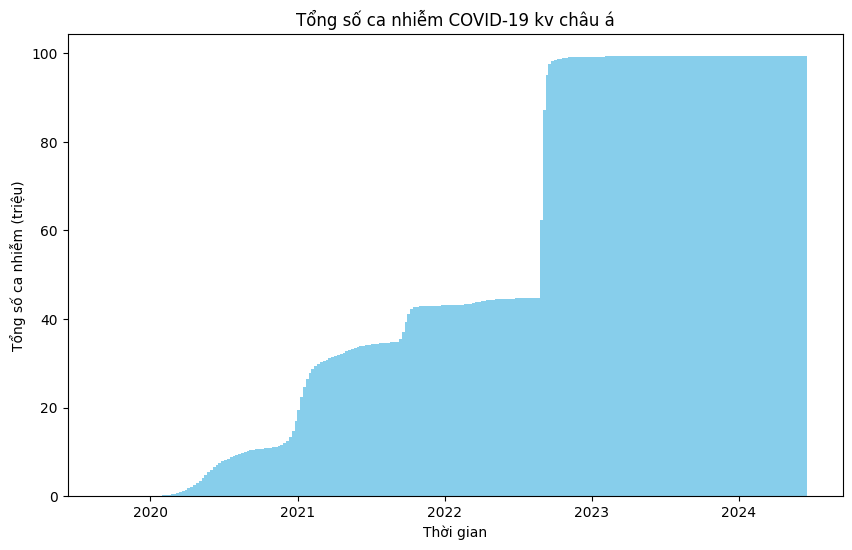

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tập tin CSV và lọc dữ liệu của kv châu á
data = pd.read_csv('owid-covid-data.csv')
asia_data = data[data['continent']=='Asia']

# Lấy thông tin về tổng số ca nhiễm theo thời gian
dates = pd.to_datetime(asia_data['date'])
total_cases = asia_data['total_cases'] / 1000000 # Chuyển đơn vị sang triệu

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.bar(dates, total_cases, width=pd.DateOffset(months=8), align='center', color='skyblue')
plt.xlabel('Thời gian')
plt.ylabel('Tổng số ca nhiễm (triệu)')
plt.title('Tổng số ca nhiễm COVID-19 kv châu á')
plt.show()


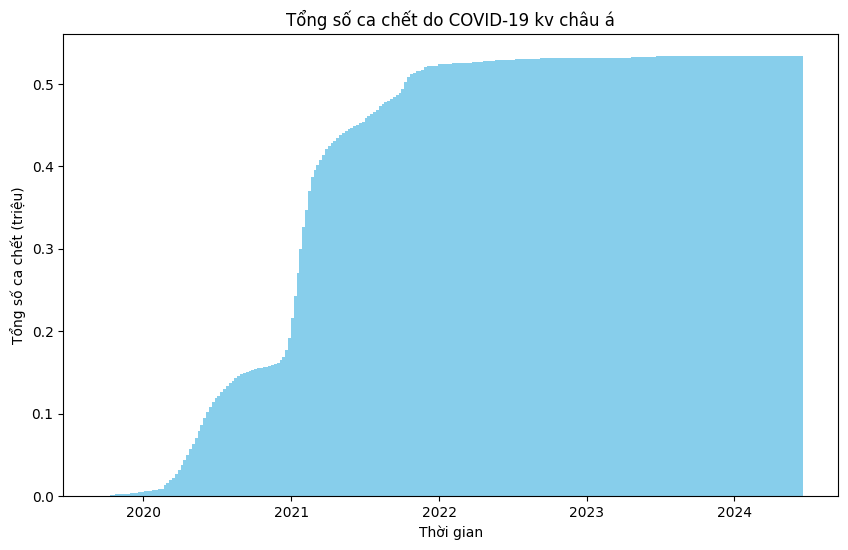

In [ ]:
# Lấy thông tin về tổng số ca nhiễm theo thời gian
dates = pd.to_datetime(asia_data['date'])
total_deaths = asia_data['total_deaths'] / 1000000 # Chuyển đơn vị sang triệu

#vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.bar(dates, total_deaths, width=pd.DateOffset(months=8), align='center', color='skyblue')
plt.xlabel('Thời gian')
plt.ylabel('Tổng số ca chết (triệu)')
plt.title('Tổng số ca chết do COVID-19 kv châu á')
plt.show()


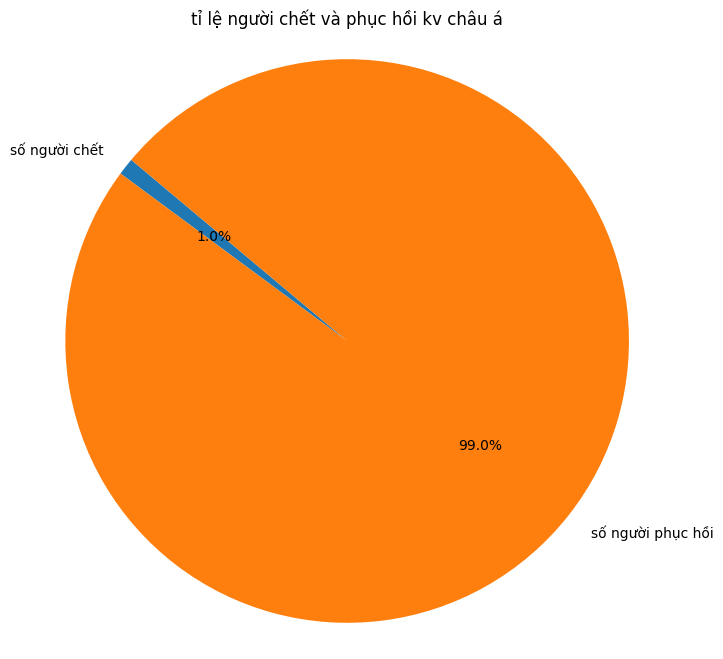

In [ ]:
import numpy as np
# Tính số ca hồi phục kv châu á
total_recovered_asia = data_asia['total_cases'].sum() - data_asia['total_deaths'].sum()
#tỉ lệ số ca tử vong, số ca hồi phục so với số ca nhiễm
percent_recover =  (total_recovered_asia / data_asia['total_cases'].sum()) *100
percent_deaths = (data_asia['total_deaths'].sum() / data_asia['total_cases'].sum()) *100
sizes = [percent_deaths, percent_recover]  # Phần trăm của mỗi phần
labels = ['số người chết', 'số người phục hồi',]  # Nhãn tương ứng với mỗi phần

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)  # startangle để xoay biểu đồ
plt.title('tỉ lệ người chết và phục hồi kv châu á')
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.show()

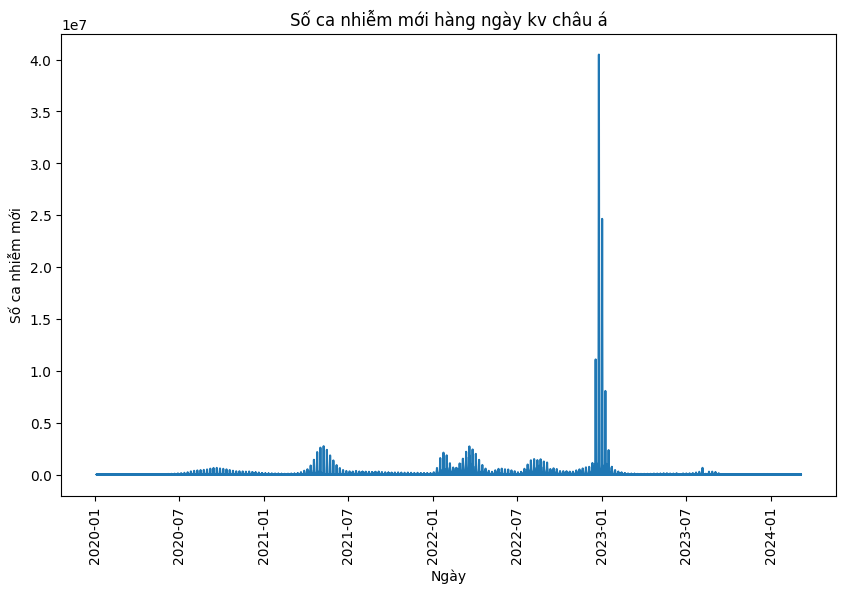

In [ ]:
# Tạo biểu đồ đường thể hiện số ca nhiễm mới hàng ngày kv châu á
plt.figure(figsize=(10, 6))
plt.plot(data_asia['date'], data_asia['new_cases'])
plt.title('Số ca nhiễm mới hàng ngày kv châu á')
plt.xlabel('Ngày')
plt.ylabel('Số ca nhiễm mới')
plt.xticks(rotation=90)
plt.show()


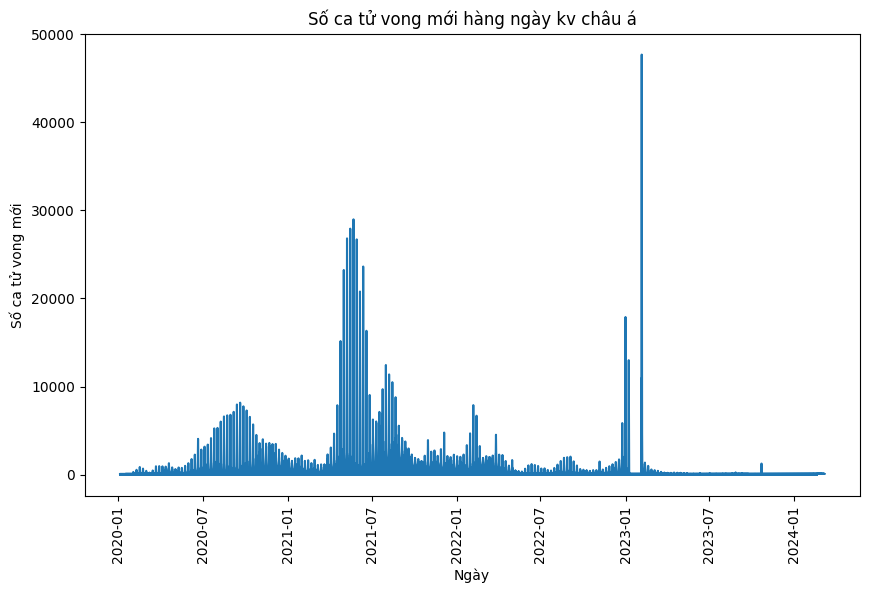

In [ ]:
# Tạo biểu đồ đường thể hiện số ca tử vong mới hàng ngày kv châu á
plt.figure(figsize=(10, 6))
plt.plot(data_asia['date'], data_asia['new_deaths'])
plt.title('Số ca tử vong mới hàng ngày kv châu á')
plt.xlabel('Ngày')
plt.ylabel('Số ca tử vong mới')
plt.xticks(rotation=90)
plt.show()

<ipython-input-191-b0778daeb154>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='date', y='new_cases', data=data_asia, palette='Blues', label='Số ca nhiễm mới')
<ipython-input-191-b0778daeb154>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='date', y='new_deaths', data=data_asia, palette='Blacks', label='Số ca tử vong mới')


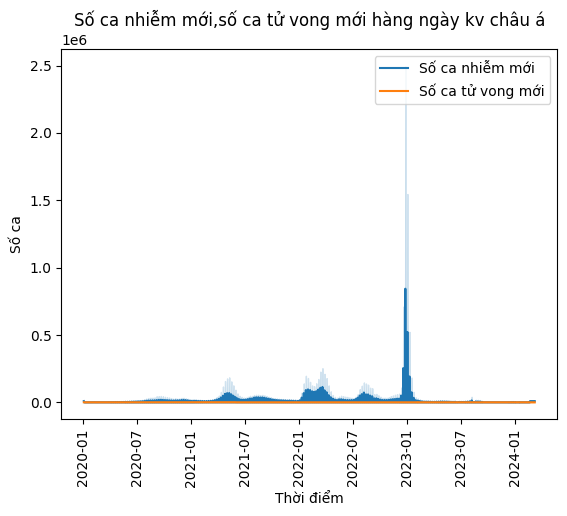

In [ ]:
# Tạo biểu đồ đường thể hiện số ca nhiễm mới và số ca tử vong mới hàng ngày tại Việt Nam
sns.lineplot(x='date', y='new_cases', data=data_asia, palette='Blues', label='Số ca nhiễm mới')
sns.lineplot(x='date', y='new_deaths', data=data_asia, palette='Blacks', label='Số ca tử vong mới')
plt.title('Số ca nhiễm mới,số ca tử vong mới hàng ngày kv châu á')
plt.xlabel('Thời điểm')
plt.ylabel('Số ca')
plt.xticks(rotation=90)

# Định dạng trục x để chỉ hiển thị tháng và năm cách nhau 4 tháng
ax = plt.gca()
# ax.xaxis.set_major_locator(pd.DateOffset(months=4))

plt.legend()
plt.show()

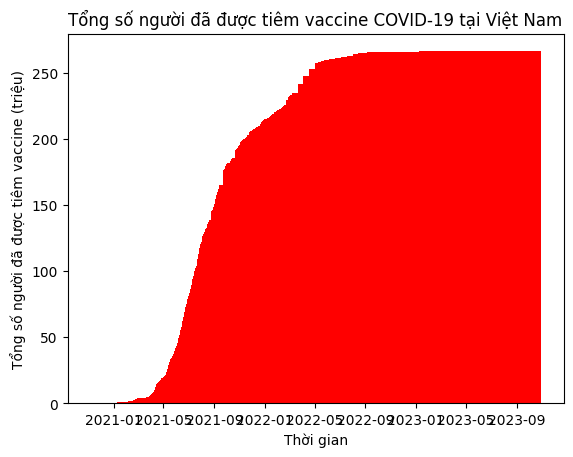

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tập  tin CSV và lọc dữ liệu của Việt Nam
data = pd.read_csv('owid-covid-data.csv')
vietnam_data = data[data['location']=='Vietnam']

# Lấy thông tin về tổng số người đã được tiêm vaccine theo thời gian
dates = pd.to_datetime(vietnam_data['date'])
total_vaccinations = vietnam_data['total_vaccinations'] / 1000000 # Chuyển đơn vị sang triệu

# Vẽ biểu đồ
fig, ax = plt.subplots()
ax.bar(dates, total_vaccinations, width=pd.DateOffset(months=8), align='center', color = 'red')
ax.xaxis_date()
ax.set_xlabel('Thời gian')
ax.set_ylabel('Tổng số người đã được tiêm vaccine (triệu)')
ax.set_title('Tổng số người đã được tiêm vaccine COVID-19 tại Việt Nam')
plt.show()

In [ ]:
#tổng số ca nhiễm tại Việt Nam
total_cases_vn = vietnam_data['total_cases'].max()
#tổng số ca tử vong khu vực châu á
total_deaths_vn = vietnam_data['total_deaths'].max()

print("Tổng số ca nhiễm khu vực châu á là:", total_cases_vn)
print("Tổng số ca tử vong trên thế giới là:", total_deaths_vn)

# Tính mức tăng hàng ngày về số ca nhiễm và số ca tử vong
new_cases_vn = vietnam_data['new_cases'].mean()
new_deaths_vn = vietnam_data['new_deaths'].mean()

print("Mức tăng hàng ngày về số ca nhiễm tại Việt Nam là:", new_cases_vn)
print("Mức tăng hàng ngày về số ca tử vong tại Việt Nam là:", new_deaths_vn)

Tổng số ca nhiễm khu vực châu á là: 11624000.0
Tổng số ca tử vong trên thế giới là: 43206.0
Mức tăng hàng ngày về số ca nhiễm tại Việt Nam là: 7718.459495351925
Mức tăng hàng ngày về số ca tử vong tại Việt Nam là: 28.689243027888445


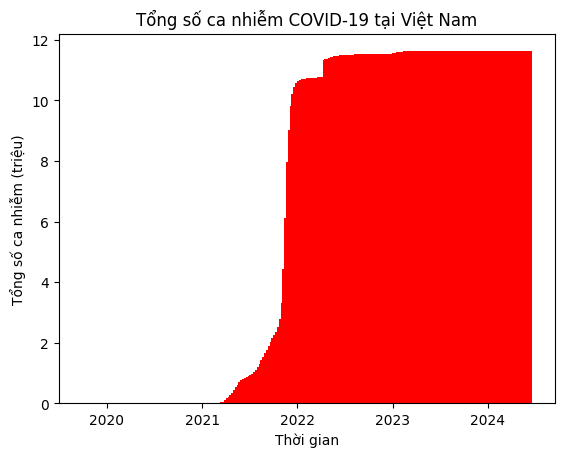

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tập tin CSV và lọc dữ liệu của Việt Nam
data = pd.read_csv('owid-covid-data.csv')
vietnam_data = data[data['location']=='Vietnam']

# Lấy thông tin về tổng số ca nhiễm theo thời gian
dates = pd.to_datetime(vietnam_data['date'])
total_cases = vietnam_data['total_cases'] / 1000000 # Chuyển đơn vị sang triệu

# Vẽ biểu đồ
fig, ax = plt.subplots()
ax.bar(dates, total_cases,color='red', width=pd.DateOffset(months=8), align='center')
ax.xaxis_date()
ax.set_xlabel('Thời gian')
ax.set_ylabel('Tổng số ca nhiễm (triệu)')
ax.set_title('Tổng số ca nhiễm COVID-19 tại Việt Nam')
plt.show()

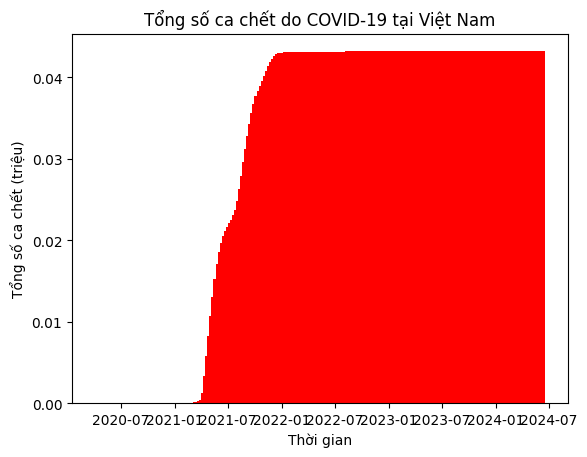

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tập tin CSV và lọc dữ liệu của Việt Nam
data = pd.read_csv('owid-covid-data.csv')
vietnam_data = data[data['location']=='Vietnam']

# Lấy thông tin về tổng số ca chết theo thời gian
dates = pd.to_datetime(vietnam_data['date'])
total_deaths = vietnam_data['total_deaths'] / 1000000 # Chuyển đơn vị sang triệu

# Vẽ biểu đồ
fig, ax = plt.subplots()
ax.bar(dates, total_deaths,color='red', width=pd.DateOffset(months=8), align='center')
ax.xaxis_date()
ax.set_xlabel('Thời gian')
ax.set_ylabel('Tổng số ca chết (triệu)')
ax.set_title('Tổng số ca chết do COVID-19 tại Việt Nam')
plt.show()

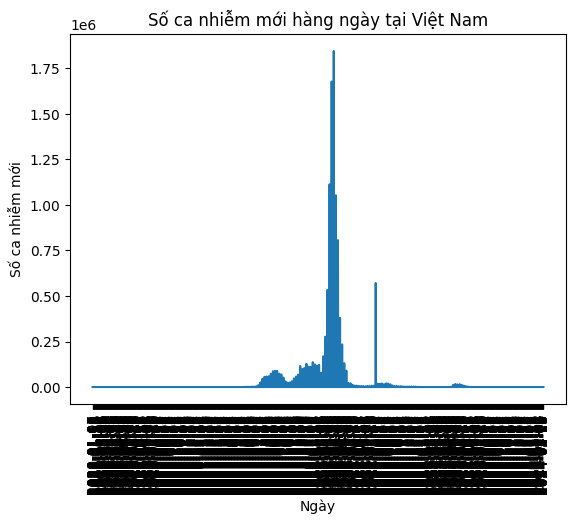

In [ ]:
# Tạo biểu đồ đường thể hiện số ca nhiễm mới hàng ngày tại Việt Nam
plt.plot(vietnam_data['date'], vietnam_data['new_cases'])
plt.title('Số ca nhiễm mới hàng ngày tại Việt Nam')
plt.xlabel('Ngày')
plt.ylabel('Số ca nhiễm mới')
plt.xticks(rotation=90)
plt.show()

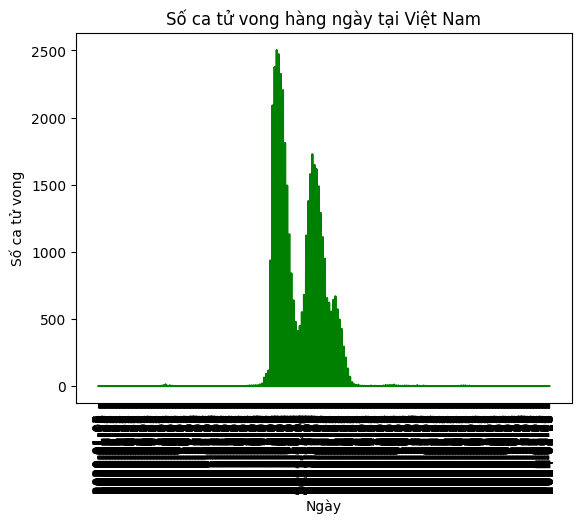

In [ ]:
# Tạo biểu đồ đường thể hiện số ca chêt mới hàng ngày tại Việt Nam
plt.plot(vietnam_data['date'], vietnam_data['new_deaths'],color='green')
plt.title('Số ca tử vong hàng ngày tại Việt Nam')
plt.xlabel('Ngày')
plt.ylabel('Số ca tử vong')
plt.xticks(rotation=90)
plt.show()

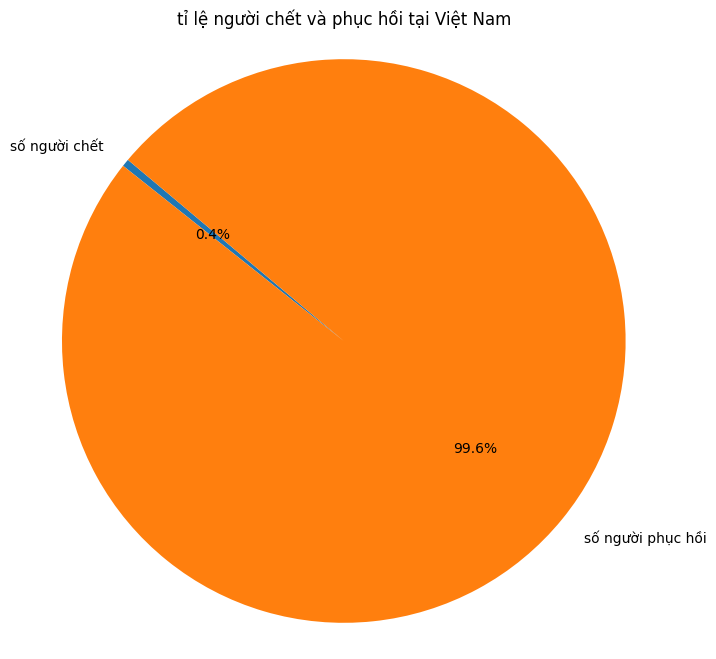

In [ ]:
import numpy as np
# Tính số ca hồi phục của Việt Nam
total_recovered_vn = vietnam_data['total_cases'].sum() - vietnam_data['total_deaths'].sum()
#tỉ lệ số ca tử vong, số ca hồi phục so với số ca nhiễm
percent_recover_vn =  (total_recovered_vn / vietnam_data['total_cases'].sum()) *100
percent_deaths_vn = (vietnam_data['total_deaths'].sum() / vietnam_data['total_cases'].sum()) *100
sizes = [percent_deaths_vn, percent_recover_vn]  # Phần trăm của mỗi phần
labels = ['số người chết', 'số người phục hồi',]  # Nhãn tương ứng với mỗi phần

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)  # startangle để xoay biểu đồ
plt.title('tỉ lệ người chết và phục hồi tại Việt Nam')
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.show()

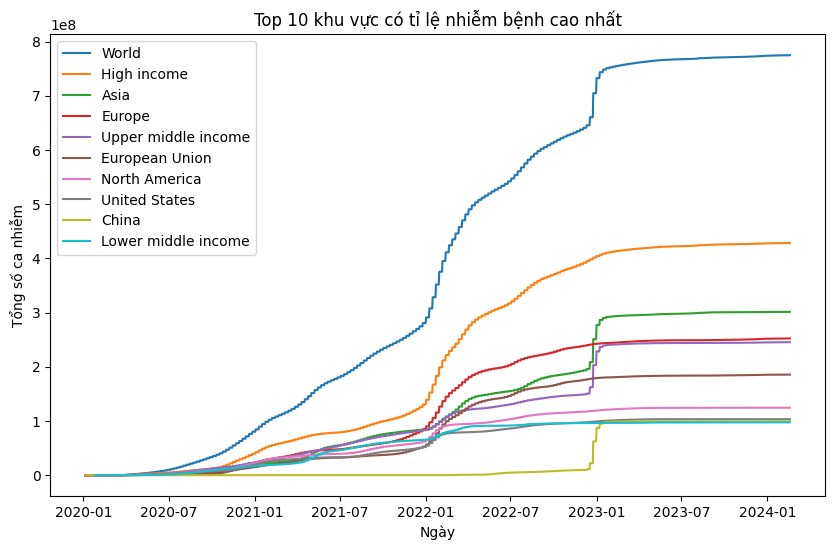

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tập tin owid-covid-data.csv vào DataFrame
df = pd.read_csv('owid-covid-data.csv')
df["date"] = pd.to_datetime(df["date"])
# Nhóm các quốc gia theo số ca nhiễm và lấy 10 quốc gia đầu tiên
top_10_countries = df.groupby('location')['total_cases'].max().nlargest(10).index.tolist()

# Lọc dữ liệu cho 10 quốc gia này và vẽ biểu đồ
df_top_10 = df[df['location'].isin(top_10_countries)]
fig,ax = plt.subplots(figsize=(10, 6))
for country in top_10_countries:
    data = df_top_10[df_top_10['location'] == country]
    ax.plot(data['date'], data['total_cases'], label=country)
ax.legend()
ax.set_xlabel('Ngày')
ax.set_ylabel('Tổng số ca nhiễm')
ax.set_title('Top 10 khu vực có tỉ lệ nhiễm bệnh cao nhất')
plt.show()

In [ ]:
# Tỉ lệ tử vong của mỗi quốc gia
data["case_fatality_rate"] = data["total_deaths"] / data["total_cases"]
data_cfr = data.groupby("location")["case_fatality_rate"].max().sort_values(ascending=False)

# In ra 10 quốc gia có tỉ lệ tử vong caonhất
print("Top 10 quốc gia có tỉ lệ tử vong cao nhất:")
print(data_cfr.head(10))

Top 10 quốc gia có tỉ lệ tử vong cao nhất:
location
Lower middle income    0.089552
Name: case_fatality_rate, dtype: float64


<ipython-input-272-82b9e7141fcc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["case_fatality_rate"] = data["total_deaths"] / data["total_cases"]


In [ ]:
# Tổng số ca nhiễm và số ca tử vong của mỗi quốc gia
data_total_cases = data.groupby("location")["total_cases"].max().sort_values(ascending=False)
data_total_deaths = data.groupby("location")["total_deaths"].max().sort_values(ascending=False)

# In ra 10 quốc gia có số ca nhiễm và số ca tử vong cao nhất
print("Top 10 quốc gia có số ca nhiễm cao nhất:")
print(data_total_cases.head(10))
print("Top 10 quốc gia có số ca tử vong cao nhất:")
print(data_total_deaths.head(10))

Top 10 quốc gia có số ca nhiễm cao nhất:
location
Lower middle income    97517029.0
Name: total_cases, dtype: float64
Top 10 quốc gia có số ca tử vong cao nhất:
location
Lower middle income    1341284.0
Name: total_deaths, dtype: float64


In [ ]:

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Bước 1: Thu thập và chuẩn bị dữ liệu
data = pd.read_csv('owid-covid-data.csv')
vietnam_data = data[data['location'] == 'Vietnam'][['date', 'total_cases']]
vietnam_data['date'] = pd.to_datetime(vietnam_data['date'])
vietnam_data.set_index('date', inplace=True)

train_data = vietnam_data[:-30]
test_data = vietnam_data[-30:]

# chuyển các giá trị trống thành giá trị mean của cột
mean_value = vietnam_data['total_cases'].mean()
vietnam_data['total_cases'].fillna(mean_value, inplace=True)


In [ ]:
# Bước 2: Xây dựng mô hình hồi quy tuyến tính
X_train = np.array(range(len(train_data)))[:, np.newaxis]
y_train = train_data['total_cases'].values
X_test = np.array(range(len(train_data), len(train_data)+len(test_data)))[:, np.newaxis]

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Bước 3: Dự đoán số ca nhiễm trong 5 tháng tới
n_days = 150
next_days = pd.date_range(start=vietnam_data.index[-1]+timedelta(days=1),end=vietnam_data.index[-1]+timedelta(days=n_days))
X_next_days =np.array(range(len(vietnam_data), len(vietnam_data)+n_days))[:, np.newaxis]
predicted_cases = regressor.predict(X_next_days)
predicted_data = pd.DataFrame({'date': next_days, 'total_cases': predicted_cases})
predicted_data.set_index('date', inplace=True)

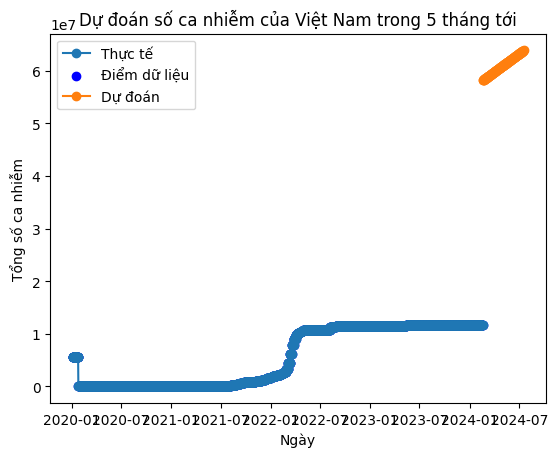

In [ ]:
# Bước 4: Vẽ biểu đồ từ mô hình dự đoán
plt.plot(vietnam_data.index, vietnam_data['total_cases'], label='Thực tế',marker='o')
plt.scatter(vietnam_data.index, vietnam_data['total_cases'], color='blue', label='Điểm dữ liệu', marker='o')
plt.plot(predicted_data.index, predicted_data['total_cases'], label='Dự đoán',marker='o')
plt.title('Dự đoán số ca nhiễm của Việt Nam trong 5 tháng tới')
plt.xlabel('Ngày')
plt.ylabel('Tổng số ca nhiễm')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data = pd.read_csv('owid-covid-data.csv')
# Lấy dữ liệu cho quốc gia Việt Nam
data_vn = data[data['iso_code'] == 'VNM']

# Chọn các đặc trưng quan tâm
features = ['total_cases', 'total_deaths', 'new_cases_smoothed', 'new_deaths_smoothed', 'new_vaccinations_smoothed']

# Xóa các dòng chứa giá trị thiếu
data_vn.dropna(subset=features, inplace=True)

<ipython-input-9-e20286f29858>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_vn.dropna(subset=features, inplace=True)


In [ ]:
# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
train_data, test_data, train_labels, test_labels = train_test_split(data_vn[features], data_vn['total_cases'], test_size=0.2, random_state=42)

# Huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(train_data, train_labels)

# Dự đoán số ca nhiễm trong tương lai với tập kiểm tra
predictions = model.predict(test_data)

In [ ]:
# Đánh giá hiệu suất mô hình bằng RMSE vàR-squared
rmse = np.sqrt(mean_squared_error(test_labels, predictions))
r_squared = r2_score(test_labels, predictions)
print('RMSE:', rmse)
print('R-squared:', r_squared)

# Dự đoán số ca nhiễm hoặc số ca tử vong trong tương lai từ các đặc trưng mới
new_features = np.array([1000, 20, 50, 1, 5000]).reshape(1, -1)
new_predictions = model.predict(new_features)
print('New predictions:', new_predictions)

RMSE: 1.128716869068225e-09
R-squared: 1.0
New predictions: [1000.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd

# Load data
df = pd.read_csv('/content/owid-covid-data.csv')

# Calculate the incidence rate (number of cases per 100,000 population)
df['incidence_rate'] = df['total_cases'] / df['population'] * 100000

# Select the relevant features for clustering
X = df[['total_cases', 'incidence_rate']].dropna()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


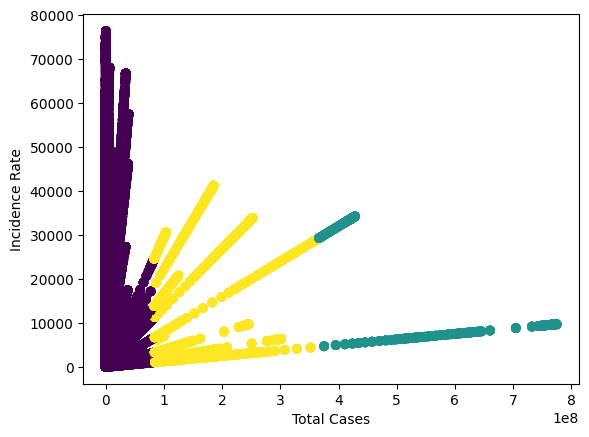

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Thực hiện phân cụm KMeans với 3 cụm
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

# Trực quan hóa kết quả bằng biểu đồ phân tán
plt.scatter(X['total_cases'], X['incidence_rate'], c=kmeans.labels_)
plt.xlabel('Total Cases')
plt.ylabel('Incidence Rate')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load data
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

# Gán tên cột
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# Chọn các tính năng có liên quan để phân cụm
X = iris[['petal_length', 'petal_width']]

# Chuyển đổi mảng dữ liệu tonumpy
X = np.array(X)

In [ ]:
# Thực hiện phân cụm
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

# Lấy nhãn cụm
labels = kmeans.labels_

# Lấy tọa độ các trung tâm cụm
centers = kmeans.cluster_centers_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


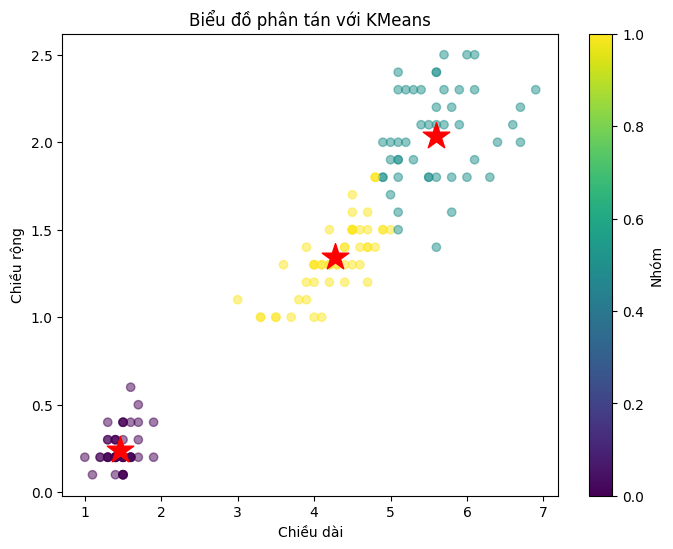

In [ ]:

# Trực quan hóa bằng biểu đồ phân tán
plt.figure(figsize=(8, 6))  # Đặt kích thước của biểu đồ
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.5)  # Tinh chỉnh màu sắc và độ trong suốt
plt.scatter(centers[:, 0], centers[:, 1], marker='*', s=400, c='red')  # Đánh dấu các trung tâm với marker và kích thước lớn
plt.xlabel('Chiều dài')
plt.ylabel('Chiều rộng')
plt.title('Biểu đồ phân tán với KMeans')
plt.colorbar(label='Nhóm')  # Thêm colorbar để giải thích màu sắc
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


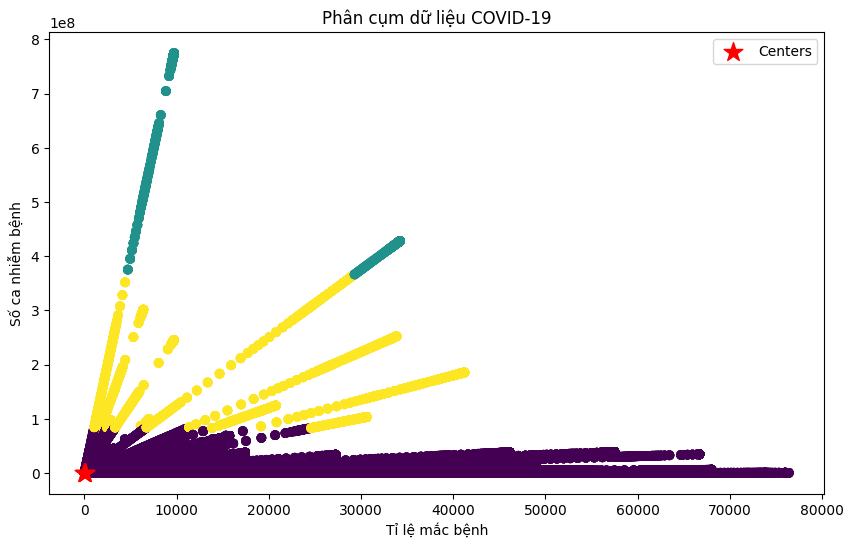

Silhouette Score: 0.9621883064317128


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/content/owid-covid-data.csv')

# Calculate the incidence rate (number of cases per 100,000 population)
df['incidence_rate'] = df['total_cases'] / df['population'] * 100000

# Select the relevant features for clustering
X = df[['total_cases', 'incidence_rate']].dropna()

# Initialize KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)

# Fit KMeans to the data
kmeans.fit(X)

# Get cluster labels and silhouette score
labels = kmeans.labels_
silhouette_avg = silhouette_score(X, labels)

# Visualize the results with scatter plot
plt.figure(figsize=(10, 6))  # Đặt kích thước của biểu đồ

# Vẽ biểu đồ phân tán
plt.scatter(X['incidence_rate'], X['total_cases'], c=labels, marker='o', cmap='viridis', alpha=0.8)

# Vẽ các điểm trung tâm cụm
plt.scatter(centers[:, 0], centers[:, 1], marker='*', s=200, c='red', label='Centers')

# Đặt nhãn cho trục x và y
plt.xlabel('Tỉ lệ mắc bệnh')
plt.ylabel('Số ca nhiễm bệnh')

# Đặt tiêu đề cho biểu đồ
plt.title('Phân cụm dữ liệu COVID-19')

# Thêm chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()

print("Silhouette Score:", silhouette_avg)


In [ ]:
#Phần
import pandas as pd
from textblob import TextBlob

# Đọc dữ liệu từ tập tin csv
df = pd.read_csv('/content/owid-covid-data.csv')

# Lấy các trường dữ liệu liên quan đến Covid-19
data = df[['location', 'date', 'total_cases', 'total_deaths', 'population']]

# Tạo một trường mới chứa các cảm nhận của người dùng về Covid-19
data['sentiment'] = ""

# Phân tích tình cảm cho mỗi quốc gia và lưu kết quả vào trường sentiment
for i, row in data.iterrows():
    # Tạo một đoạn văn bản chứa thông tin về Covid-19 của quốc gia đó
    text = f"Total cases: {row['total_cases']}, Total deaths: {row['total_deaths']}, Population: {row['population']}"
    # Phân tích tình cảm của đoạn văn bản sử dụng TextBlob
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity

    # Xác định tình cảm của đoạn văn bản và lưu vào trường sentiment
    if sentiment > 0:
        data.at[i, 'sentiment'] = "positive"
    elif sentiment < 0:
        data.at[i, 'sentiment'] = "negative"
    else:
        data.at[i, 'sentiment'] = "neutral"

# Hiển thị dữ liệu đã phân tích tình cảm
print(data)

<ipython-input-66-18cc10b68f4b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment'] = ""


           location        date  total_cases  total_deaths  population  \
0       Afghanistan  2020-01-05          NaN           NaN  41128772.0   
1       Afghanistan  2020-01-06          NaN           NaN  41128772.0   
2       Afghanistan  2020-01-07          NaN           NaN  41128772.0   
3       Afghanistan  2020-01-08          NaN           NaN  41128772.0   
4       Afghanistan  2020-01-09          NaN           NaN  41128772.0   
...             ...         ...          ...           ...         ...   
380400     Zimbabwe  2024-02-14     266328.0        5737.0  16320539.0   
380401     Zimbabwe  2024-02-15     266328.0        5737.0  16320539.0   
380402     Zimbabwe  2024-02-16     266328.0        5737.0  16320539.0   
380403     Zimbabwe  2024-02-17     266328.0        5737.0  16320539.0   
380404     Zimbabwe  2024-02-18     266350.0        5737.0  16320539.0   

       sentiment  
0        neutral  
1        neutral  
2        neutral  
3        neutral  
4        neutral

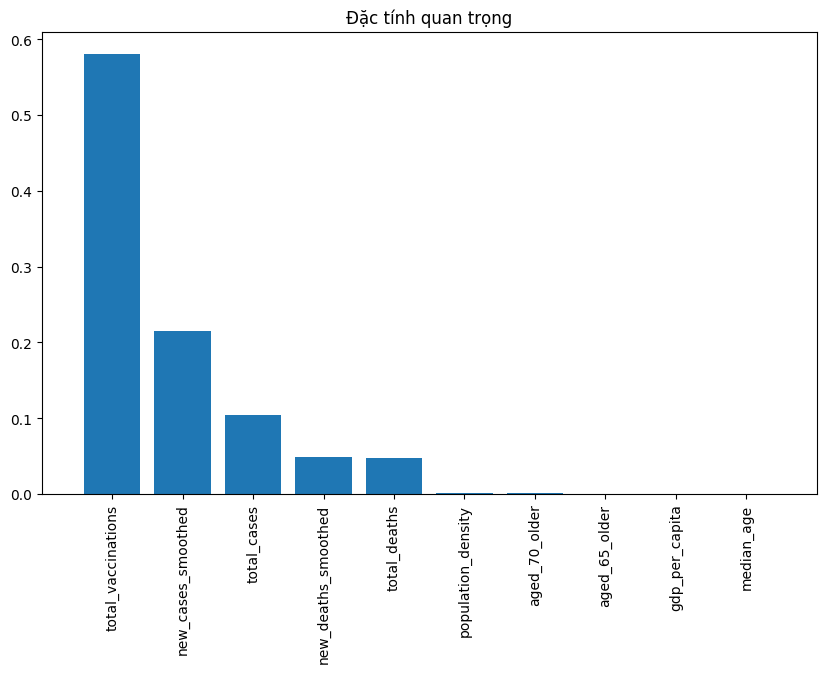

In [12]:
#phần d
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Đọc file csv
data = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

# Chọn các tính năng có liên quan và biến mục tiêu
features = ['total_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths_smoothed', 'total_vaccinations', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita']
target = 'new_cases'

# Xóa các hàng có giá trị bị thiếu
data.dropna(subset=features+[target], inplace=True)

# Chia dữ liệu thành các tính năng và mục tiêu
X = data[features]
y = data[target]

# Khởi tạo và điều chỉnh một bộ hồi quy Rừng ngẫu nhiên
clf = RandomForestRegressor(n_estimators=5, random_state=42)
clf.fit(X, y)

# Nhận tầm quan trọng của tính năng
importances = clf.feature_importances_

# Sắp xếp tầm quan trọng của tính năng theo thứ tự giảm dần
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Đặc tính quan trọng")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


In [13]:
#Đánh giá mô hình randomforest phần d
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình trên tập huấn luyện
clf.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = clf.predict(X_test)

# Đánh giá mô hình
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# In ra kết quả đánh giá
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

##MÔ HÌNH QUÁ Ư LÀ TỆ :<<

Mean Absolute Error: 37273.42448256608
Mean Squared Error: 338223569229.365
Root Mean Squared Error: 581569.9177479566
